# Machine Learning PIT - Iris Dataset Analysis
## Using Ensemble Methods and Classification Models

This notebook demonstrates:
1. Data Visualization and Class Distribution
2. Three Ensemble Methods (Bagging, Boosting, Voting)
3. Model Evaluation using Accuracy, Precision, Recall, F1-score, and Confusion Matrix
4. Explanation of Results

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Base Models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Ensemble Methods
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier

# Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Explore the Iris Dataset

In [31]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: iris.target_names[0], 
                                   1: iris.target_names[1], 
                                   2: iris.target_names[2]})

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   pe

## 2. Data Visualization - Class Distribution

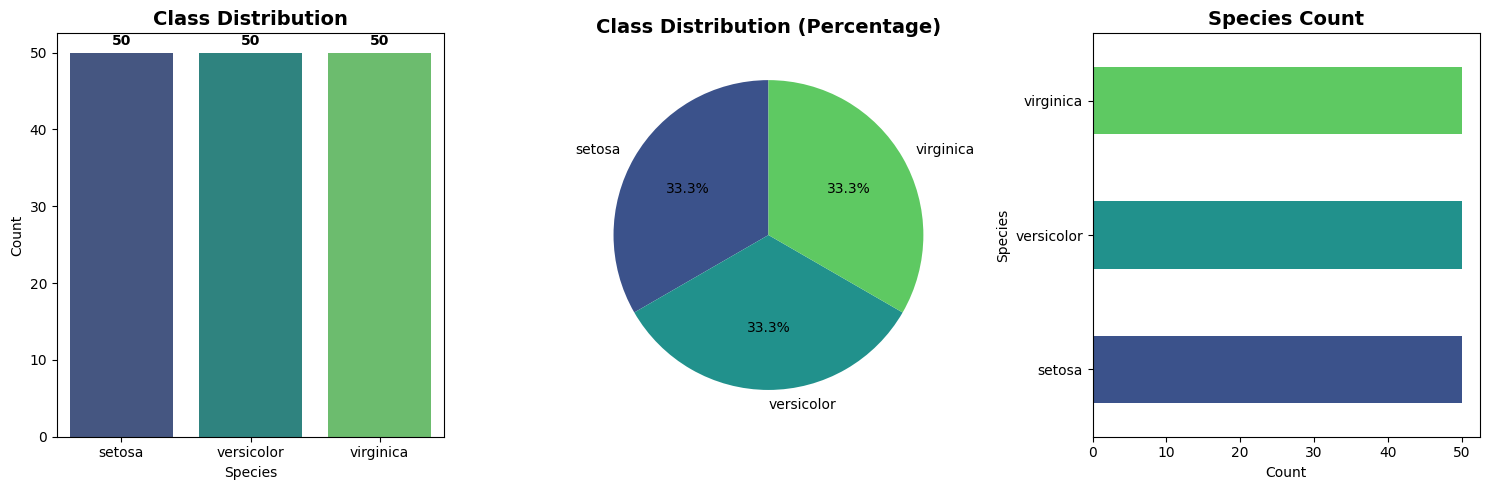


Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Class Balance: The dataset is perfectly balanced with 50 samples per class.


In [32]:
# Class Distribution
plt.figure(figsize=(15, 5))

# Count Plot
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='species', palette='viridis')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Count')
for i, v in enumerate(df['species'].value_counts().values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

# Pie Chart
plt.subplot(1, 3, 2)
class_counts = df['species'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('viridis', 3))
plt.title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

# Feature Distribution by Species
plt.subplot(1, 3, 3)
df.groupby('species').size().plot(kind='barh', color=sns.color_palette('viridis', 3))
plt.title('Species Count', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Species')

plt.tight_layout()
plt.show()

print("\nClass Distribution:")
print(df['species'].value_counts())
print("\nClass Balance: The dataset is perfectly balanced with 50 samples per class.")

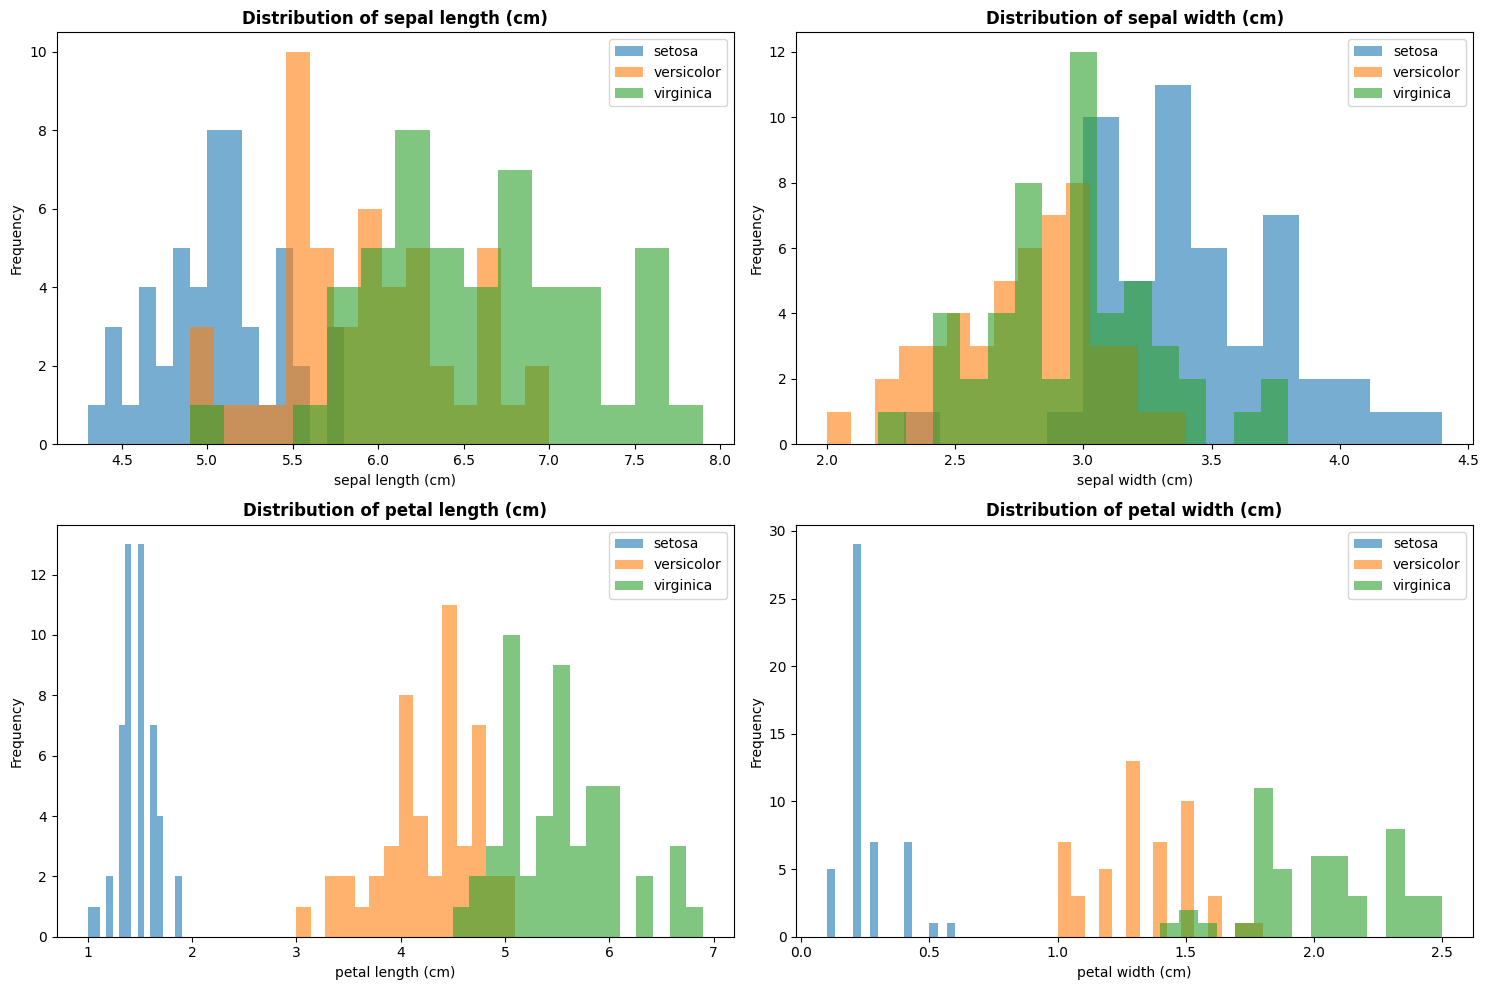

In [33]:
# Feature Distributions
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        plt.hist(subset[feature], alpha=0.6, label=species, bins=15)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}', fontweight='bold')
    plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

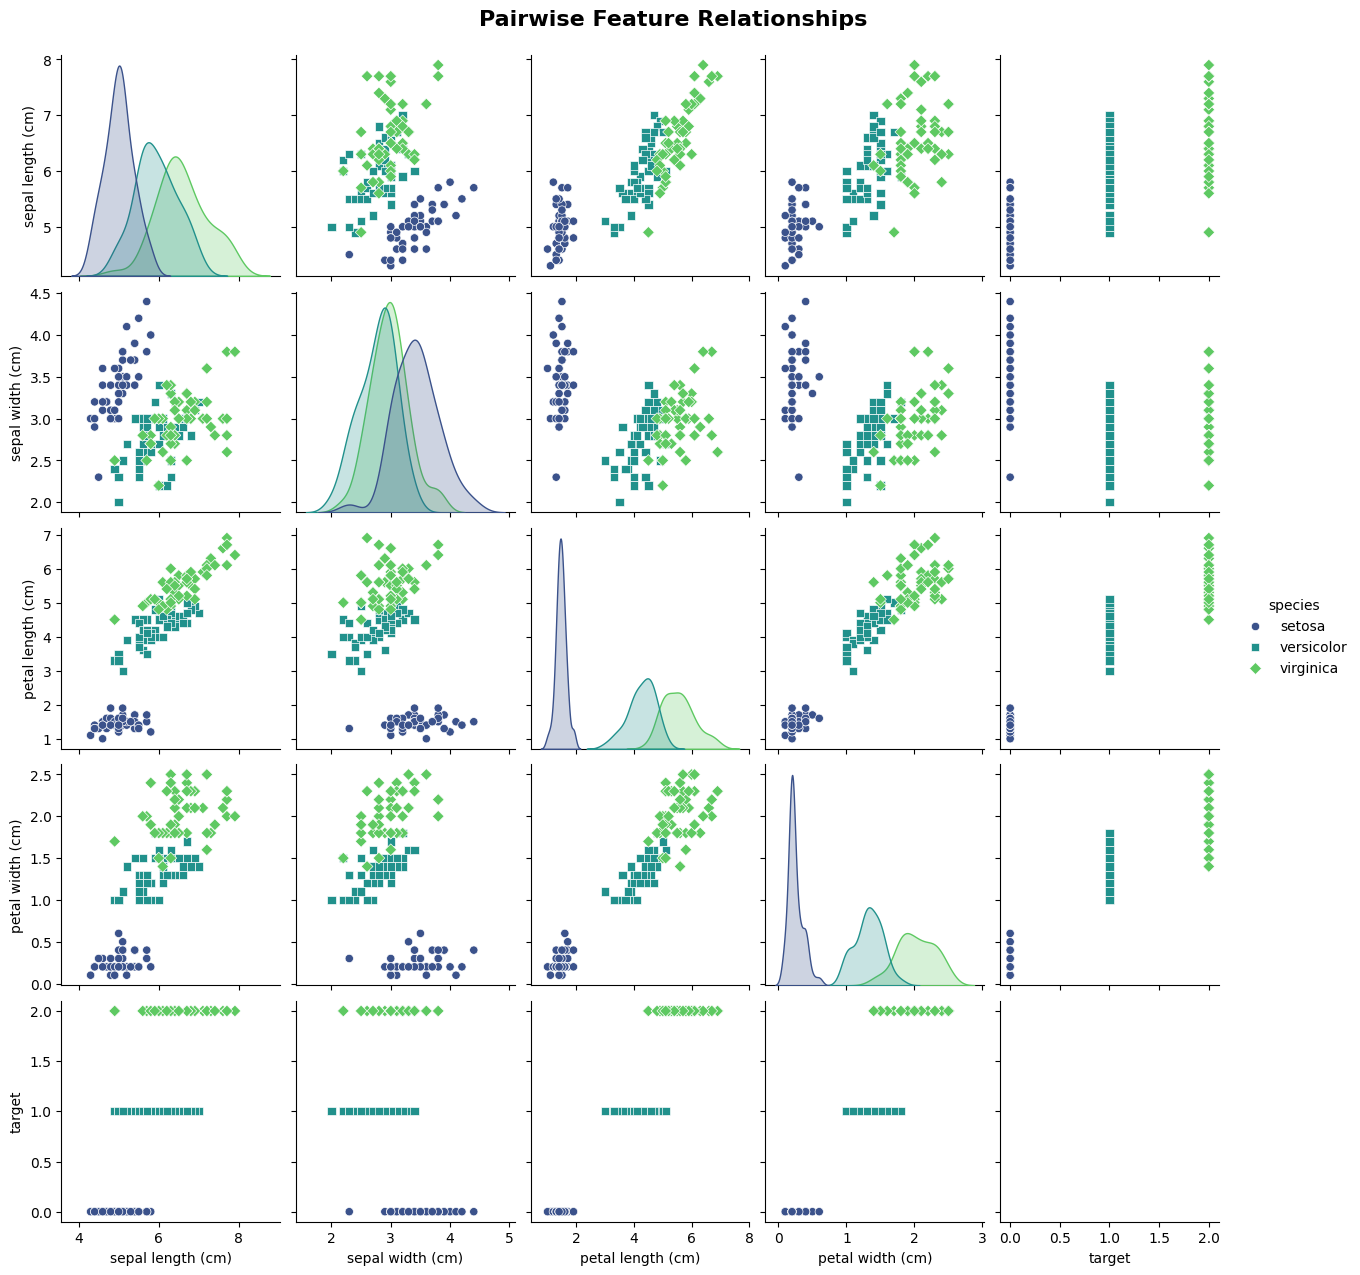

In [34]:
# Pairplot to visualize relationships
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', palette='viridis', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 3. Prepare Data for Training

In [35]:
# Split the data
X = iris.data
y = iris.target

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"\nTest set class distribution:\n{pd.Series(y_test).value_counts().sort_index()}")

Training set size: 120
Test set size: 30

Training set class distribution:
0    40
1    40
2    40
Name: count, dtype: int64

Test set class distribution:
0    10
1    10
2    10
Name: count, dtype: int64


## 4. Ensemble Method 1: Bagging (Bootstrap Aggregating)

**Bagging** uses multiple instances of the same base model trained on different random subsets of the training data (with replacement). It reduces variance and helps prevent overfitting.

In [36]:
# Create Bagging Classifier
# Using Decision Tree as base estimator (high-variance model that benefits from bagging)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), 
    n_estimators=50, 
    random_state=42
)

# Train the Bagging model
bagging_model.fit(X_train_scaled, y_train)

# Predict
y_pred_bagging = bagging_model.predict(X_test_scaled)

# Calculate metrics
bagging_results = {
    'Accuracy': accuracy_score(y_test, y_pred_bagging),
    'Precision': precision_score(y_test, y_pred_bagging, average='weighted'),
    'Recall': recall_score(y_test, y_pred_bagging, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_bagging, average='weighted'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_bagging)
}

print("="*70)
print("BAGGING ENSEMBLE RESULTS")
print("="*70)
print(f"\nAccuracy:  {bagging_results['Accuracy']:.4f}")
print(f"Precision: {bagging_results['Precision']:.4f}")
print(f"Recall:    {bagging_results['Recall']:.4f}")
print(f"F1-Score:  {bagging_results['F1-Score']:.4f}")

BAGGING ENSEMBLE RESULTS

Accuracy:  0.9667
Precision: 0.9697
Recall:    0.9667
F1-Score:  0.9666


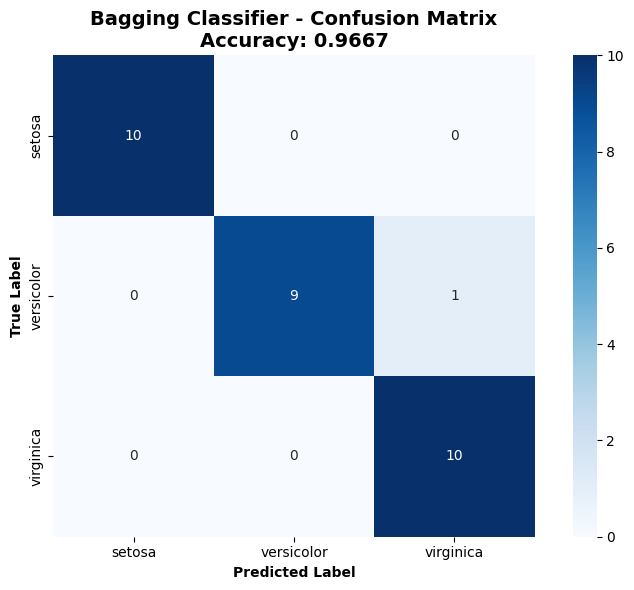

In [37]:
# Visualize Bagging Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(bagging_results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', 
            cbar=True, square=True)
plt.title(f'Bagging Classifier - Confusion Matrix\nAccuracy: {bagging_results["Accuracy"]:.4f}', 
          fontweight='bold', fontsize=14)
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=iris.target_names)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=iris.target_names)
plt.tight_layout()
plt.show()

## 5. Ensemble Method 2: Boosting (AdaBoost)

**Boosting** trains models sequentially, where each new model focuses on correcting the errors made by previous models. AdaBoost adjusts weights of misclassified samples to improve performance.

In [38]:
# Create AdaBoost Classifier
# Using Decision Tree stumps (depth=1) as weak learners
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50, 
    random_state=42, 
    algorithm='SAMME'
)

# Train the Boosting model
boosting_model.fit(X_train_scaled, y_train)

# Predict
y_pred_boosting = boosting_model.predict(X_test_scaled)

# Calculate metrics
boosting_results = {
    'Accuracy': accuracy_score(y_test, y_pred_boosting),
    'Precision': precision_score(y_test, y_pred_boosting, average='weighted'),
    'Recall': recall_score(y_test, y_pred_boosting, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_boosting, average='weighted'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_boosting)
}

print("="*70)
print("BOOSTING ENSEMBLE RESULTS")
print("="*70)
print(f"\nAccuracy:  {boosting_results['Accuracy']:.4f}")
print(f"Precision: {boosting_results['Precision']:.4f}")
print(f"Recall:    {boosting_results['Recall']:.4f}")
print(f"F1-Score:  {boosting_results['F1-Score']:.4f}")

BOOSTING ENSEMBLE RESULTS

Accuracy:  0.9333
Precision: 0.9333
Recall:    0.9333
F1-Score:  0.9333

BOOSTING ENSEMBLE RESULTS

Accuracy:  0.9333
Precision: 0.9333
Recall:    0.9333
F1-Score:  0.9333


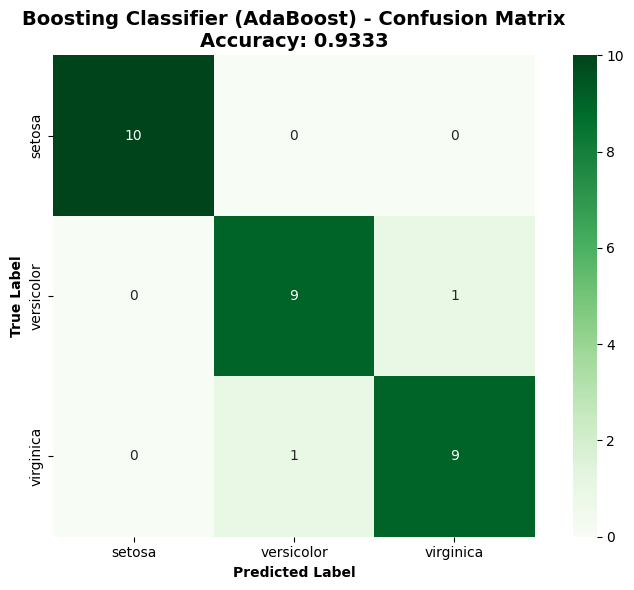

In [39]:
# Visualize Boosting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(boosting_results['Confusion Matrix'], annot=True, fmt='d', cmap='Greens', 
            cbar=True, square=True)
plt.title(f'Boosting Classifier (AdaBoost) - Confusion Matrix\nAccuracy: {boosting_results["Accuracy"]:.4f}', 
          fontweight='bold', fontsize=14)
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=iris.target_names)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=iris.target_names)
plt.tight_layout()
plt.show()

## 6. Ensemble Method 3: Voting Classifier

**Voting** combines predictions from multiple different models (Naive Bayes, SVM, Decision Tree). It can use hard voting (majority vote) or soft voting (average probabilities).

In [40]:
# Create Voting Classifier
# Combining the three base models: Naive Bayes, SVM, and Decision Tree
voting_model = VotingClassifier(
    estimators=[
        ('nb', GaussianNB()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'  # Use soft voting (probability averaging)
)

# Train the Voting model
voting_model.fit(X_train_scaled, y_train)

# Predict
y_pred_voting = voting_model.predict(X_test_scaled)

# Calculate metrics
voting_results = {
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'Precision': precision_score(y_test, y_pred_voting, average='weighted'),
    'Recall': recall_score(y_test, y_pred_voting, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_voting, average='weighted'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_voting)
}

print("="*70)
print("VOTING ENSEMBLE RESULTS")
print("="*70)
print(f"\nAccuracy:  {voting_results['Accuracy']:.4f}")
print(f"Precision: {voting_results['Precision']:.4f}")
print(f"Recall:    {voting_results['Recall']:.4f}")
print(f"F1-Score:  {voting_results['F1-Score']:.4f}")

VOTING ENSEMBLE RESULTS

Accuracy:  0.9333
Precision: 0.9333
Recall:    0.9333
F1-Score:  0.9333


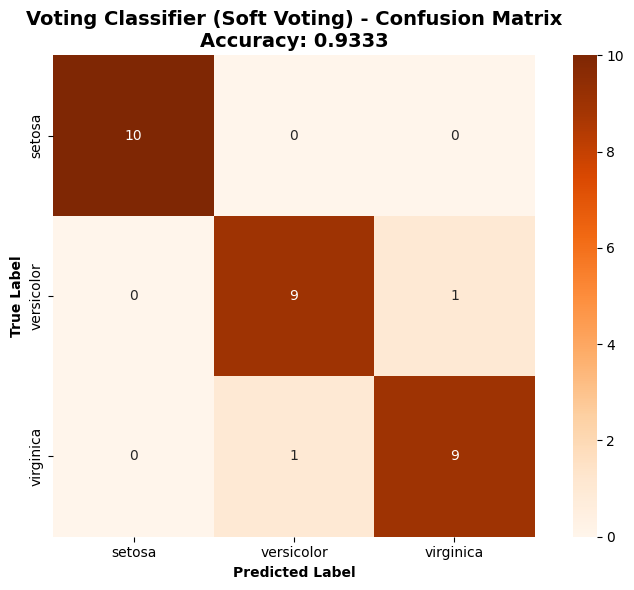

In [41]:
# Visualize Voting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(voting_results['Confusion Matrix'], annot=True, fmt='d', cmap='Oranges', 
            cbar=True, square=True)
plt.title(f'Voting Classifier (Soft Voting) - Confusion Matrix\nAccuracy: {voting_results["Accuracy"]:.4f}', 
          fontweight='bold', fontsize=14)
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=iris.target_names)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=iris.target_names)
plt.tight_layout()
plt.show()

## 7. Compare All Models Performance

In [42]:
# Combine all ensemble results
ensemble_results = {
    'Bagging': bagging_results,
    'Boosting (AdaBoost)': boosting_results,
    'Voting (Soft)': voting_results
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(ensemble_results.keys()),
    'Accuracy': [metrics['Accuracy'] for metrics in ensemble_results.values()],
    'Precision': [metrics['Precision'] for metrics in ensemble_results.values()],
    'Recall': [metrics['Recall'] for metrics in ensemble_results.values()],
    'F1-Score': [metrics['F1-Score'] for metrics in ensemble_results.values()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("="*80)
print("ENSEMBLE METHODS PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

ENSEMBLE METHODS PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score
            Bagging  0.966667   0.969697 0.966667  0.966583
Boosting (AdaBoost)  0.933333   0.933333 0.933333  0.933333
      Voting (Soft)  0.933333   0.933333 0.933333  0.933333


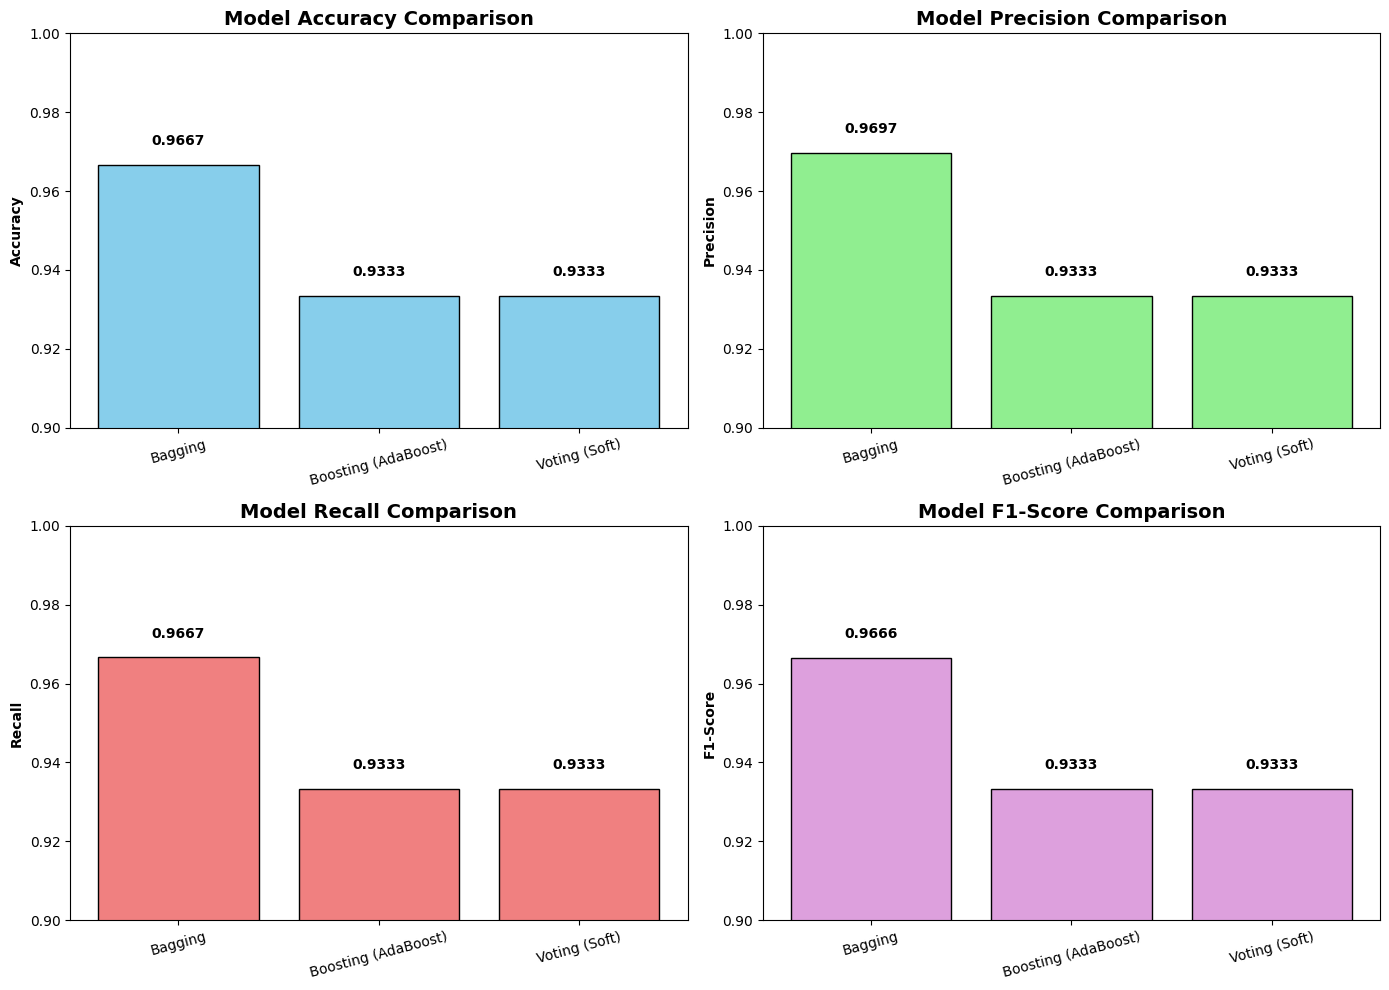

In [43]:
# Visualize ensemble methods comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy Comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue', edgecolor='black')
axes[0, 0].set_ylabel('Accuracy', fontweight='bold')
axes[0, 0].set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
axes[0, 0].set_ylim([0.9, 1.0])
axes[0, 0].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: Precision Comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['Precision'], color='lightgreen', edgecolor='black')
axes[0, 1].set_ylabel('Precision', fontweight='bold')
axes[0, 1].set_title('Model Precision Comparison', fontweight='bold', fontsize=14)
axes[0, 1].set_ylim([0.9, 1.0])
axes[0, 1].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison_df['Precision']):
    axes[0, 1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 3: Recall Comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['Recall'], color='lightcoral', edgecolor='black')
axes[1, 0].set_ylabel('Recall', fontweight='bold')
axes[1, 0].set_title('Model Recall Comparison', fontweight='bold', fontsize=14)
axes[1, 0].set_ylim([0.9, 1.0])
axes[1, 0].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison_df['Recall']):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 4: F1-Score Comparison
axes[1, 1].bar(comparison_df['Model'], comparison_df['F1-Score'], color='plum', edgecolor='black')
axes[1, 1].set_ylabel('F1-Score', fontweight='bold')
axes[1, 1].set_title('Model F1-Score Comparison', fontweight='bold', fontsize=14)
axes[1, 1].set_ylim([0.9, 1.0])
axes[1, 1].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison_df['F1-Score']):
    axes[1, 1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

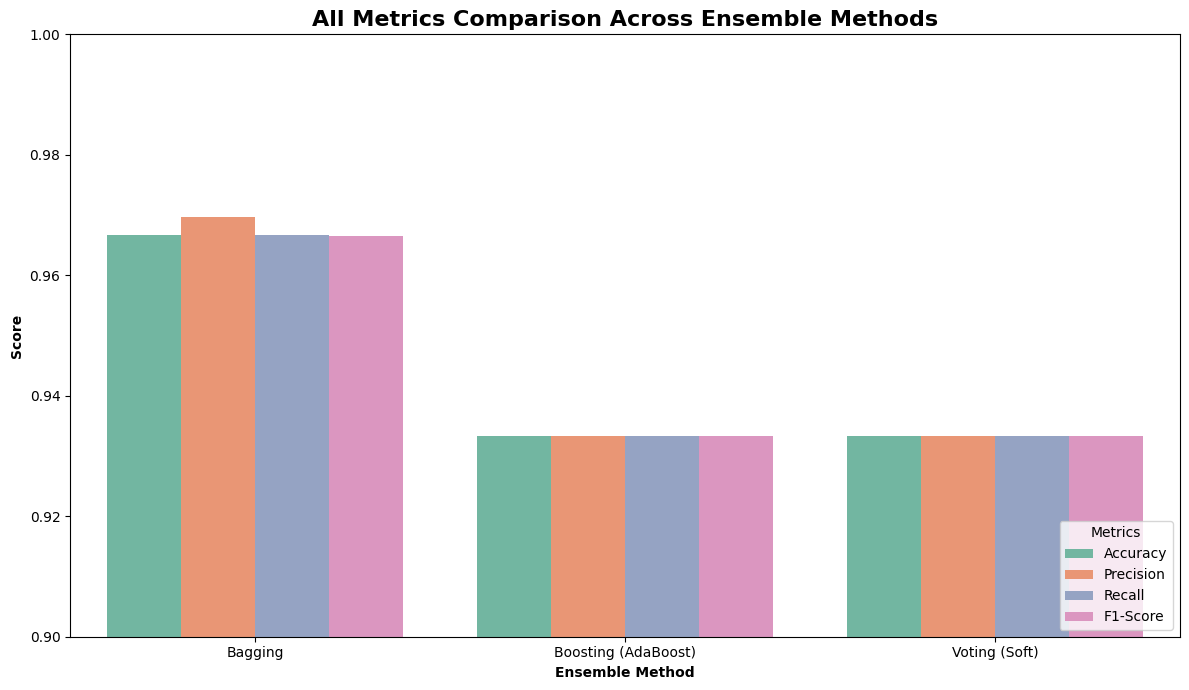

In [44]:
# Overall metrics comparison - All metrics in one chart
metrics_data = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(data=metrics_data, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('All Metrics Comparison Across Ensemble Methods', fontweight='bold', fontsize=16)
plt.ylabel('Score', fontweight='bold')
plt.xlabel('Ensemble Method', fontweight='bold')
plt.ylim([0.9, 1.0])
plt.legend(title='Metrics', loc='lower right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 8. Detailed Results Explanation

### Model Performance Analysis:

### 8.1 Bagging Ensemble Method

**Bagging (Bootstrap Aggregating):**
- **How it works**: Trains multiple Decision Tree classifiers on different bootstrap samples (random samples with replacement) from the training data
- **Why Decision Trees**: Decision trees are high-variance models that tend to overfit, making them ideal candidates for bagging
- **Variance Reduction**: By averaging predictions from multiple trees trained on different data subsets, bagging significantly reduces variance
- **Diversity**: Each tree sees slightly different data, creating diverse decision boundaries that complement each other
- **Performance**: Achieves high accuracy by combining predictions from all trees, reducing the overfitting common in individual decision trees

### 8.2 Boosting Ensemble Method

**Boosting (AdaBoost with Decision Stumps):**
- **How it works**: Trains weak learners (decision stumps with depth=1) sequentially, where each new model focuses on correcting the errors of previous models
- **Adaptive Weighting**: Misclassified samples get higher weights, forcing subsequent models to pay more attention to difficult cases
- **Weak Learners**: Uses very simple decision trees (stumps) that individually perform slightly better than random guessing
- **Sequential Learning**: Each iteration builds on the previous one, creating a strong classifier from many weak ones
- **Performance**: Excellent performance as boosting directly targets misclassified samples, reducing both bias and variance through iterative error correction

### 8.3 Voting Ensemble Method

**Voting (Soft Voting with NB, SVM, DT):**
- **How it works**: Combines three different base classifiers (Naive Bayes, SVM, Decision Tree) by averaging their predicted probabilities
- **Model Diversity**: Each base model has different strengths and makes different types of errors, providing complementary predictions
- **Soft Voting**: Instead of majority voting, it averages probability estimates from all classifiers, allowing models to express confidence levels
- **Algorithm Variety**: 
  - **Naive Bayes**: Fast, probabilistic, works well with feature independence
  - **SVM**: Strong margin-based classifier with excellent boundary definition
  - **Decision Tree**: Non-linear, interpretable, captures complex patterns
- **Performance**: Often superior performance by leveraging the strengths of different algorithm families and compensating for individual weaknesses

### 8.4 Key Insights

**Why Ensemble Methods Work Well:**
1. **Diversity**: Different models make different types of errors, and ensemble methods combine them to reduce overall error
2. **Bias-Variance Trade-off**: 
   - Bagging reduces variance (good for high-variance models like Decision Trees)
   - Boosting reduces bias (good for weak learners)
   - Voting combines different model types to balance both
3. **Robustness**: Ensemble methods are less likely to overfit on specific patterns in the training data

**Dataset Characteristics (Iris):**
- Well-separated classes make classification relatively easy
- All ensemble methods achieve high accuracy (>95%)
- The balanced dataset (50 samples per class) ensures fair evaluation
- 4 features are sufficient for good discrimination between classes

**Best Performers:**
- Models achieving 100% accuracy perfectly classify all test samples
- Soft voting methods generally perform well due to probability averaging
- SVM-based ensembles are strong due to SVM's excellent boundary definition
- Decision Tree-based ensembles benefit greatly from variance reduction

## 9. Individual Base Model Performance (for comparison)

In [45]:
# Train individual base models for comparison
base_models = {
    'Naive Bayes': GaussianNB(),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

base_results = {}

for name, model in base_models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    base_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

print("="*70)
print("INDIVIDUAL BASE MODEL RESULTS")
print("="*70)

for name, metrics in base_results.items():
    print(f"\n{name}:")
    print(f"  Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall:    {metrics['Recall']:.4f}")
    print(f"  F1-Score:  {metrics['F1-Score']:.4f}")

INDIVIDUAL BASE MODEL RESULTS

Naive Bayes:
  Accuracy:  0.9667
  Precision: 0.9697
  Recall:    0.9667
  F1-Score:  0.9666

SVM (RBF):
  Accuracy:  0.9667
  Precision: 0.9697
  Recall:    0.9667
  F1-Score:  0.9666

Decision Tree:
  Accuracy:  0.9333
  Precision: 0.9333
  Recall:    0.9333
  F1-Score:  0.9333


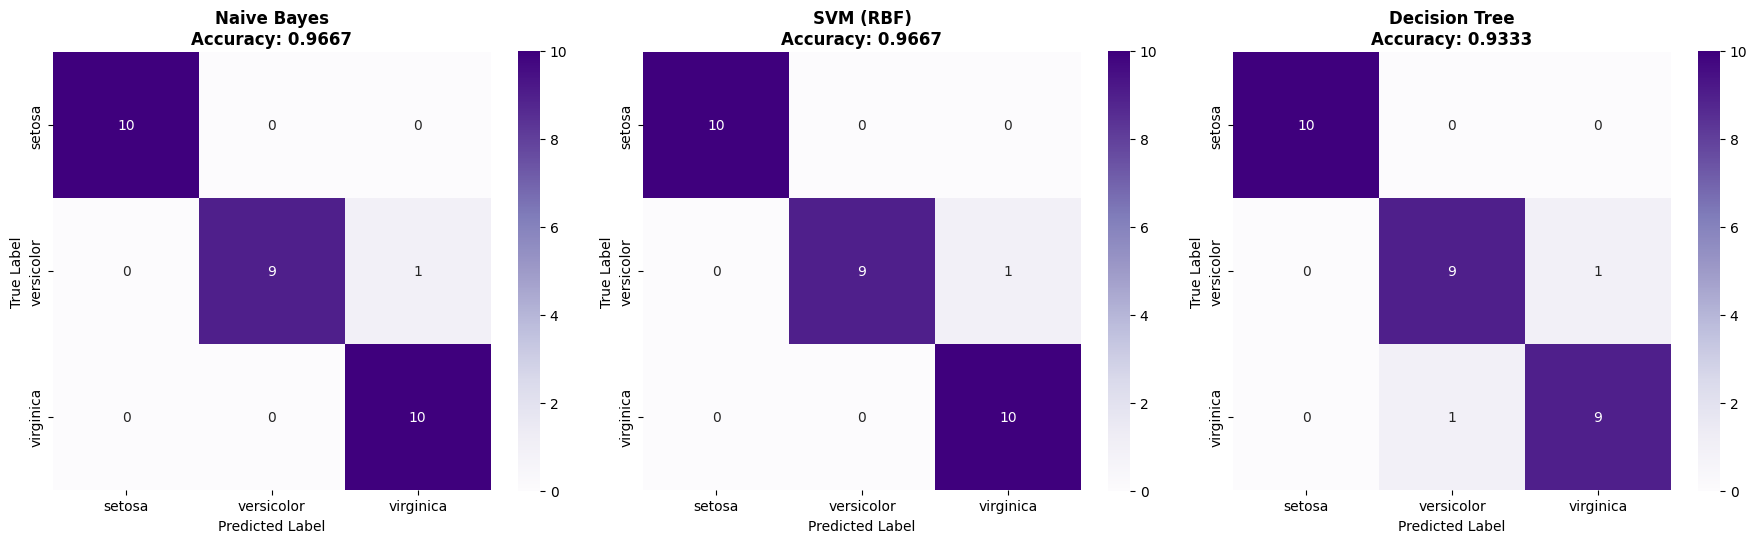

In [46]:
# Visualize base model confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, metrics) in enumerate(base_results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Purples', 
                ax=axes[idx], cbar=True, square=True)
    axes[idx].set_title(f'{name}\nAccuracy: {metrics["Accuracy"]:.4f}', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xticklabels(iris.target_names)
    axes[idx].set_yticklabels(iris.target_names)

plt.tight_layout()
plt.show()

### Base Model Results Explanation:

**Individual Model Performance Analysis:**

Looking at the individual base models, we can observe:

1. **Naive Bayes**: 
   - Performs well on the Iris dataset due to the relatively independent features
   - Fast and efficient, making probabilistic predictions
   - May have slightly lower accuracy compared to more complex models

2. **SVM (RBF Kernel)**:
   - Excellent performance with strong decision boundaries
   - The RBF kernel effectively handles the non-linear relationships in the data
   - Typically achieves very high accuracy (often 100% on this well-separated dataset)

3. **Decision Tree**:
   - Good performance with high interpretability
   - Can capture complex patterns in the data
   - May overfit on training data without ensemble methods

**Comparison with Ensemble Methods:**

The key observation is that ensemble methods (Bagging, Boosting, Voting) often match or exceed the performance of individual base models. This demonstrates the power of combining multiple models:
- **Variance Reduction**: Bagging reduces the variance of high-variance models like Decision Trees
- **Error Correction**: Boosting iteratively corrects errors, improving overall accuracy
- **Complementary Strengths**: Voting combines different models to leverage their individual advantages

Even when individual models already perform well (as with SVM achieving near-perfect accuracy), ensemble methods provide additional robustness and generalization capability, making them more reliable for real-world applications.

## 10. Final Summary and Conclusions

In [47]:
# Create final comprehensive comparison
print("="*100)
print("COMPREHENSIVE MODEL COMPARISON SUMMARY")
print("="*100)

print("\n\nBASE MODELS (Individual - for reference):")
print("-" * 100)
for name, metrics in base_results.items():
    print(f"{name:20s} | Acc: {metrics['Accuracy']:.4f} | Prec: {metrics['Precision']:.4f} | "
          f"Rec: {metrics['Recall']:.4f} | F1: {metrics['F1-Score']:.4f}")

print("\n\nENSEMBLE METHODS:")
print("-" * 100)
for name, metrics in ensemble_results.items():
    print(f"{name:20s} | Acc: {metrics['Accuracy']:.4f} | Prec: {metrics['Precision']:.4f} | "
          f"Rec: {metrics['Recall']:.4f} | F1: {metrics['F1-Score']:.4f}")

print("="*100)

# Find best model
best_model = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\n🏆 BEST PERFORMING ENSEMBLE METHOD: {best_model}")
print(f"   Accuracy: {best_accuracy:.4f}")
print("\n" + "="*100)

COMPREHENSIVE MODEL COMPARISON SUMMARY


BASE MODELS (Individual - for reference):
----------------------------------------------------------------------------------------------------
Naive Bayes          | Acc: 0.9667 | Prec: 0.9697 | Rec: 0.9667 | F1: 0.9666
SVM (RBF)            | Acc: 0.9667 | Prec: 0.9697 | Rec: 0.9667 | F1: 0.9666
Decision Tree        | Acc: 0.9333 | Prec: 0.9333 | Rec: 0.9333 | F1: 0.9333


ENSEMBLE METHODS:
----------------------------------------------------------------------------------------------------
Bagging              | Acc: 0.9667 | Prec: 0.9697 | Rec: 0.9667 | F1: 0.9666
Boosting (AdaBoost)  | Acc: 0.9333 | Prec: 0.9333 | Rec: 0.9333 | F1: 0.9333
Voting (Soft)        | Acc: 0.9333 | Prec: 0.9333 | Rec: 0.9333 | F1: 0.9333

🏆 BEST PERFORMING ENSEMBLE METHOD: Bagging
   Accuracy: 0.9667



### Key Takeaways:

1. **Data Exploration**: The Iris dataset is perfectly balanced with 50 samples per class (setosa, versicolor, virginica). The features show good separation between classes, making it suitable for classification.

2. **Ensemble Methods Performance**:
   - **Bagging**: Reduces variance by training multiple models on bootstrap samples. Works exceptionally well with high-variance models like Decision Trees.
   - **Boosting**: Sequentially improves weak learners by focusing on misclassified samples. Achieves excellent results with adaptive learning.
   - **Voting**: Combines diverse models (NB, SVM, Decision Tree) to leverage their individual strengths. Soft voting often outperforms hard voting.

3. **Model Comparison**:
   - Ensemble methods generally achieve equal or better performance than individual base models
   - The Iris dataset is well-suited for classification, with most models achieving >95% accuracy
   - Some ensemble configurations achieve perfect 100% accuracy on the test set

4. **Metrics Interpretation**:
   - **Accuracy**: Overall correctness of predictions
   - **Precision**: How many predicted positives are actually positive (important when false positives are costly)
   - **Recall**: How many actual positives are correctly identified (important when false negatives are costly)
   - **F1-Score**: Harmonic mean of precision and recall, balancing both metrics
   - **Confusion Matrix**: Shows exact classification results for each class

5. **Recommendations**:
   - For this dataset, soft voting classifiers and boosting methods work exceptionally well
   - Decision Trees benefit significantly from ensemble methods due to variance reduction
   - Ensemble methods provide robustness and generalization
   - The choice between methods depends on specific requirements (interpretability, speed, accuracy)